# My DE solution

## Teoretical:

$y = x^4+c_1x^2$

$c_1 = \frac{y_0}{x_0^2} - x_0^2$

## Numerical:

### Euler's method
$y' = 2x^3 + 2\frac{y}{x}$

Truncation error for euler:

$T_i = \frac{h^2}{2}y''(x_i)$

In [29]:
import numpy as np
import matplotlib.pyplot as plt
# plt.style.use("default")

In [30]:
class IVP:
    
    def __init__(self, x_0=1, y_0=2, x_max=10):
        assert x_max > x_0, "x_0 is out of range"
        self.x_max = x_max
        self.x_0 = x_0
        self.y_0 = y_0
        self.y = self.__create_y_exact()
    
    def derivative(self, x, y):
        return 2*x**3 + 2*y/x

    def __create_y_exact(self):
        assert self.x_0 != 0, "Invalid x_0 value"
        c_1 = self.y_0/(self.x_0)**2 - self.x_0**2
        return lambda x : x**4 + c_1*x**2
    


In [41]:
class IVP_computer:
    
    def __init__(self):
        pass
    
    def __compute_euler(self, x, ivp):
        y = x.copy()
        y[0] = ivp.derivative(ivp.x_0, ivp.y_0)
        for i in range(1, len(x)):
            y[i] = y[i-1]+(x[1]-x[0])*ivp.derivative(x[i-1], y[i-1])
        return y

    def __compute_improved_euler(self, x, ivp):
        y = x.copy()
        h = x[1]-x[0]
        y[0] = ivp.derivative(ivp.x_0, ivp.y_0)
        for i in range(1, len(x)):
            adder = ivp.derivative(x[i], y[i-1]+h*ivp.derivative(x[i-1], y[i-1]))
            y[i] = y[i-1]+h/2*(ivp.derivative(x[i-1], y[i-1]) + adder)
        return y

    def __compute_runge_kutta(self, x, ivp):
        y = x.copy()
        h = x[1]-x[0]
        y[0] = ivp.derivative(ivp.x_0, ivp.y_0)
        for i in range(1, len(x)):
            k1 = ivp.derivative(x[i-1], y[i-1])
            k2 = ivp.derivative(x[i-1]+h/2, y[i-1]+h/2*k1)
            k3 = ivp.derivative(x[i-1]+h/2, y[i-1]+h/2*k2)
            k4 = ivp.derivative(x[i-1]+h, y[i-1]+h*k3)
            y[i] = y[i-1] + h/6*(k1 + 2*k2 + 2*k3 + k4)
        return y

    def __get_error(self, N, ivp, approximation, return_abs):
        x = np.linspace(ivp.x_0, ivp.x_max, N)
        diff = approximation(x, ivp)[-1] - ivp.y(x[-1])
        if return_abs:
            return abs(diff)
        return diff

    def __get_error_array(self, Ns, ivp, function, return_abs):
        error = []
        for n in Ns:
            error.append(self.__get_error(int(n), ivp, function, return_abs))
        return error

    def plot_errors(self, ivp, n_min=2, n_max=1000, n_length=100, return_abs=False):
        Ns = np.linspace(n_min, n_max, n_length)
        f = plt.figure(figsize=(10, 10))
        plt.title("Methods' errors")
        plt.xlabel("n")
        plt.ylabel("error")
        plt.plot(Ns, self.__get_error_array(Ns, ivp, self.__compute_euler, return_abs), 'ro', label="euler")
        plt.plot(Ns, self.__get_error_array(Ns, ivp, self.__compute_improved_euler, return_abs), 'bo', label="improved euler")
        plt.plot(Ns, self.__get_error_array(Ns, ivp, self.__compute_runge_kutta, return_abs), 'go', label="rk")
        plt.grid()
        plt.legend()
        plt.savefig("errors.png")
        return f
    
    def get_least_error():
        pass

    def plot_results(self, ivp, N=100):
        
        x = np.linspace(ivp.x_0, ivp.x_max, N)
        f = plt.figure(figsize=(10, 10))
        plt.title("Approximation results")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.plot(x, ivp.y(x), 'w-', label="exact")
        plt.plot(x, self.__compute_euler(x, ivp), 'r--', label="euler")
        plt.plot(x, self.__compute_improved_euler(x, ivp), 'b--', label="improved euler")
        plt.plot(x, self.__compute_runge_kutta(x, ivp), 'g--', label="rk")
        plt.legend()
        plt.grid()
        plt.savefig("result.png")
        return f


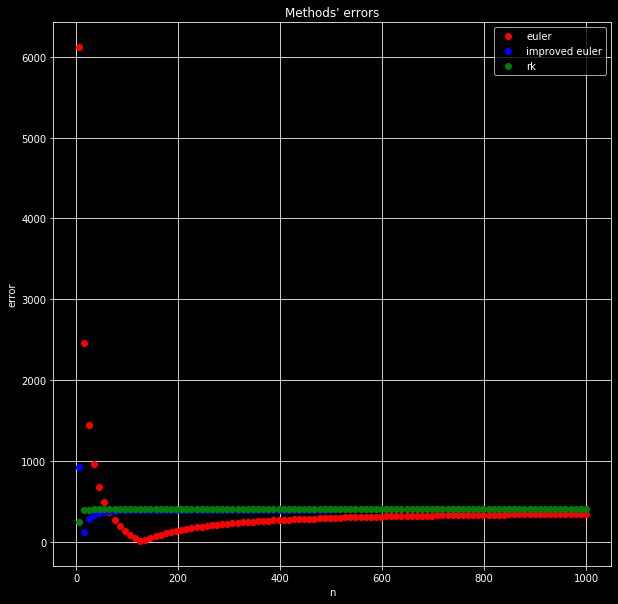

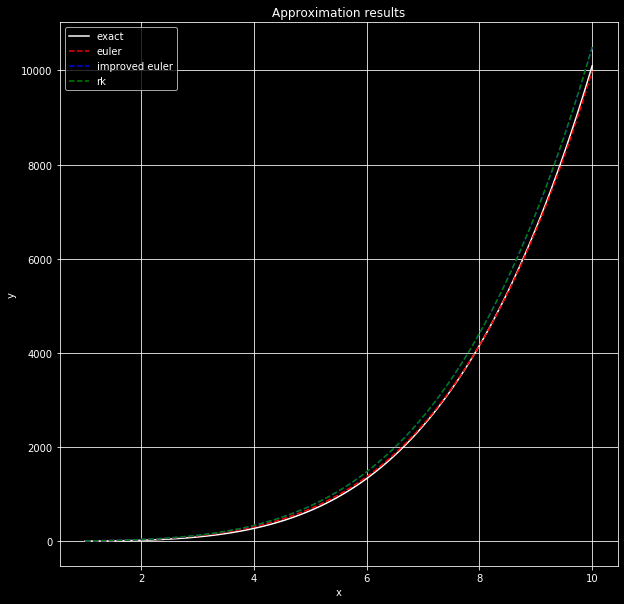

In [43]:
ivp = IVP(1, 2, 10)
computer = IVP_computer()
f1 = computer.plot_errors(ivp, return_abs=True, n_min=5)
f2 = computer.plot_results(ivp)